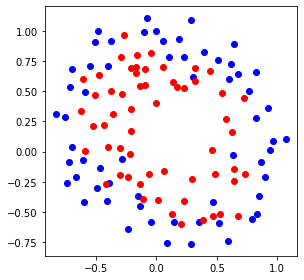

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("/content/drive/My Drive/AssignmentFolder/Assignment06/data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


iter : 177746
converge


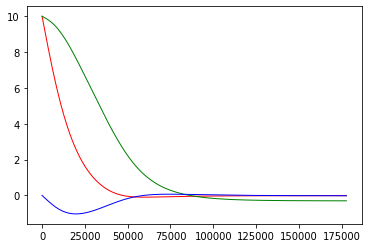

In [6]:
#x, y, label
#세타0, 세타1, 세타2
t0 = 10.0
t1 = 10.0
t2 = 0.0
#sigma(z)
sigz = 0
#Training error
J = 0

#theta list
t0_list = []
t1_list = []
t2_list = []

#error list
E = []

#learning rate alpha(a)
#0.1부터 0.001까지 /3 단위로 해봤으나 0.1, 0.03등 너무 큰 값에선 runtime warning : division zero, invalid value 등이 뜨며
#0.003에선 converge하기 위한 threshold값에 너무 빨리 도달하지만 실제로는 지그재그 형태인 것으로 추정된다
#0.001에선 아무 이상없이 threshold에 도달하였을 때 converge에 도달. 따라서 0.001이 최선의 learning rate로 보인다
a = 0.001

iter = 0
#변화가 상당히 줄어들었을 때(굉장히 작은 값의 변화) = converge
threshold = 0.0000001

while 1:
  #z = theta^T * X
  z = t0 + t1 * pointX + t2 * pointY
  #sigma(z)
  sigz = 1 / (1 + np.exp(-z))
  #error
  J = np.mean( -1 * label * np.log(sigz) - (1 - label) * np.log(1 - sigz) )
  #Threshold check을 위한 임시 값
  tmp0 = t0
  tmp1 = t1
  tmp2 = t2
  #Gradient Descent
  t0 = t0 - a * np.mean(sigz - label)
  t1 = t1 - a * np.mean((sigz - label) * pointX)
  t2 = t2 - a * np.mean((sigz - label) * pointY)
  #add to list
  t0_list.append(t0)
  t1_list.append(t1)
  t2_list.append(t2)
  E.append(J)
  #Threshold check
  if abs(tmp0 - t0) < threshold and abs(tmp1 - t1) < threshold and abs(tmp2 - t2) < threshold:
    print("iter : %d" %iter)
    print("converge")
    break

  iter += 1

t0_line = plt.plot(t0_list)
t1_line = plt.plot(t1_list)
t2_line = plt.plot(t2_list)
plt.setp(t0_line, color = 'r', linewidth = 1)
plt.setp(t1_line, color = 'g', linewidth = 1)
plt.setp(t2_line, color = 'b', linewidth = 1)

plt.show()

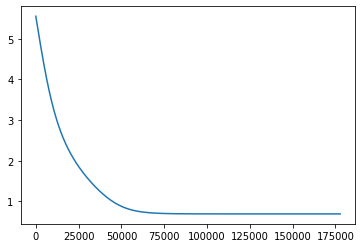

In [7]:
plt.plot(E)
plt.show()

In [13]:
#label값
l = 0
#iteration
i = 0
acc_list = []
while i < len(pointX):
  z = t0 + t1 * pointX[i] + t2 * pointY[i]
  if z > pointY[i]:
    l = 1
  else:
    l = 0
  if l == label[i]:
    acc_list.append(1)
  else:
    acc_list.append(0)

  i += 1

accuracy = acc_list.count(1) / len(acc_list)
print(accuracy)

0.4830508474576271
